<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0725_Regression_%EB%91%90%EB%B2%88_%EC%A7%B8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 간단한 simple Linear Regression 구현
# tensorflow

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# 필요한 모듈 만들기.

# 순서 기억하기
# 데이터 준비 Training data set
x_data = np.array([1,2,3,4,5]).reshape(5,1) #array 1차원 배열.reshape 2차원 5행 1열
t_data = np.array([3,5,7,9,11]).reshape(5,1)
# 원래는 데이터 전처리 과정이 진행

# Model 생성
model = Sequential()


# model 안에 layer를 넣어요.기둥 세우기
model.add(Flatten(input_shape=(1,))) # input
model.add(Dense(1,activation='linear')) # output 나중에 이거 변경됨
# 설명 0725 pdf 5page 참조 하기 linear
# moodel 설정
# learning_rate w와 update 되는 값이 다르다.
# learning_date 값은 hyperparameter 데이터가 다르다.
# 이 값을 적절한 찾아야한다.
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse') # 평균제곱 오차를 사용

# model 학습
model.fit(x_data,
         t_data,
         epochs=5000,
         verbose=0)





In [ ]:
# 학습 끝났으니
# 예측 해보자
result = model.predict([[10]])
print(result)
# 이렇게 나온 값이 정확한 값인지, 우리가 제대로 모델 만든건지
# 확인하기 힘듬
# 그래서 sklearn를 이용해서 정답과 가까운 값을 알아보고 우리 결과 비교


1/1 [==============================] - 0s 29ms/step
[[21.000032]]


In [ ]:
# 구현된 모델이 적합한지 확인 하기 위해 !
# sklearn 으로 보자.
# sklearn를 이용해서 똑같이 구현
import numpy as np
from sklearn import linear_model
# 오류난다. 다시 설치 해야한다.
# gpt에서 검색 아나콘다 환경에서 sklearn 설치 하고 싶은데 명령어 뭐냐 ?
# 명령어 다르다. 이름 부터 conda install scikit-learn 설치하기

# 데이터 준비 Training data set
x_data = np.array([1,2,3,4,5]).reshape(5,1) #array 1차원 배열.reshape 2차원 5행 1열
t_data = np.array([3,5,7,9,11]).reshape(5,1)

# model 생성
sklearn_model = linear_model.LinearRegression()

# 학습
sklearn_model.fit(x_data,t_data)

predict_value = sklearn_model.predict([[10]])
print(predict_value) # 바로 나옴


[[21.]]


In [ ]:
# 우리는 지금 독립변수가 1개인 Simple Linear Regression을 하고 있어요.
# 오존 예제는 독립변수3개, 종속 변수 1개로 구성
# 일단 온도만 독립변수로 사용 할 생각
# 온도에 따른 오존량 예측

import numpy as np
import pandas as pd # 데이터 ozone 위해
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


# raw data loading
df = pd.read_csv('./data/ozone/ozone.csv')
# display(df)

training_data_set=df[['Temp','Ozone']]
display(training_data_set)

# 제일 처음에 해야하는 작업
# 결측치를 처리해야함 Nan
# 1. 삭제
# 2. 보정
# 지금은 그냥 결치값을 삭제 해서 사용
training_data_set = training_data_set.dropna(how='any')#nan 삭제하기 위해

# display(training_data_set) # 116


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
4,56,NaN
...,...,...
148,70,30.0
149,77,NaN
150,75,14.0
151,76,18.0


,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [ ]:
# 이제 training data set
x_data = training_data_set['Temp'].values.reshape(-1,1)
t_data = training_data_set['Ozone'].values.reshape(-1,1)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
# keras_model.add(Dense(1, activation='linear'))

output_layer = Dense(1, activation='linear')
keras_model.add(output_layer)


keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                   loss='mse')
keras_model.fit(x_data,
               t_data,
               epochs=2000,
               verbose=0)





1/1 [==============================] - 0s 42ms/step
[[54.569435]]
[[0.9355382]] [-3.4339325]


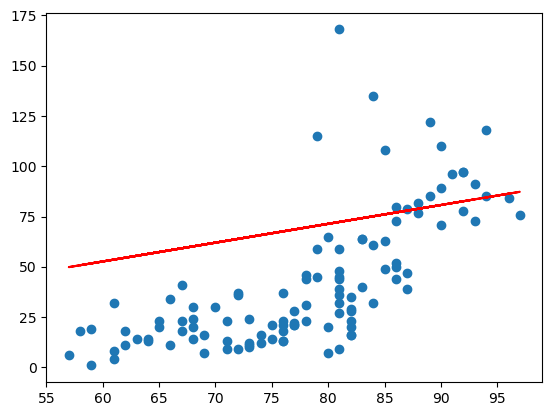

In [ ]:
# 학습이 끝났으니 이제 예측 해보자

keras_predict = keras_model.predict([[62]])
# 온도62 일때 오존량 얼마?
print(keras_predict)
#안의 랜덤으로 다르다. 32 33 34 35
# 이값이 잘 예측된 값인지 알 수가 없다. 맞는지 틀린지
# 일단 그래프로 확인해보자.

# 데이터를 scatter를 이용해서 화면에 점을 찍구요. 온도에 따른 오존량
# 우리 모델 (직선 그래프) 만들자.
# 이제 w와 b 직선그리기

# weight, bias = output_layer.get_weights()

# print (weightm, bias)
# #  수정하기

# plt.scatter(x_data,t_data)
# plt.plot(x_data,x_data*weights+bias,color='r')
# plt.show #그래프 분포에서 이상치 예를들어 저 점보다 위에 있는거
weights, bias = output_layer.get_weights()
print(weights, bias)
# [[0.8675983]] [-3.3986883]

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*weights + bias, color='r')
plt.show()


[[3.58411393]]


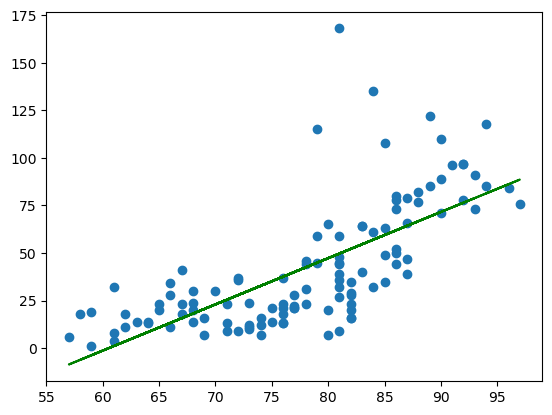

In [ ]:
# 같은 데이터를 믿고 쓰는 sklearn으로 학습 시키고 그래프를 그려보자
# sklearn 구현



import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# x_data와 t_data 위에 있다.
# model 생성
sklearn_model = linear_model.LinearRegression()

# model 학습
sklearn_model.fit(x_data,t_data)
# model 예측
sklearn_result = sklearn_model.predict([[62]])
print(sklearn_result)

# 그래프 그려보자
# 우리가 만든 모델의 가중치와 bias 알아야함

weights = sklearn_model.coef_ # 가중치 _ w 이다.
bias = sklearn_model.intercept_ # 바이어스 b이다.
plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*weights+bias, color='g')

plt.show() # 이상적인 그림



In [ ]:
# 왜 이런 문제가 생길까요?
# 한마디로 말하면 정규화가 되지 않는다.
# pdf 6번 page 확인

# 각각의 독립변수와 종속변수를 같은 비율로 만들어서 학습 진행
# 정규화는 여러가지 방법이 있어요.
# 1. min max scaling(normalization)
# 2. z-score normalization
# 3. student's t분포를 이용 normalization

# # tensorflow 낸용가지고
# 데이터 다시 정규화 시켜서 모델 학습
from sklearn.preprocessing  import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()
# scaler 한테 최대값과 최소 값을 알려줌

x_data = training_data_set['Temp'].values.reshape(-1,1)
t_data = training_data_set['Ozone'].values.reshape(-1,1)

scaler_x.fit(x_data)
scaler_t.fit(t_data)

x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(1,)))
# keras_model.add(Dense(1, activation='linear'))

output_layer = Dense(1, activation='linear')
keras_model.add(output_layer)
#  수정하기

keras_model.compile(optimizer=SGD(learning_rate=1e-4),
                   loss='mse')

keras_model.fit(x_data,
               t_data,
               epochs=2000,
               verbose=0)





In [ ]:

predict_data = 62
scaled_predict_data = scaler_x.transform([[predict_data]])
print(scaled_predict_data)#  [0.125]

keras_predict = keras_model.predict(scaled_predict_data)
print(keras_predict)

scaled_keras_predict = scaler_t.inverse_transform(keras_predict)
print(scaled_predict_data)

[[0.125]]
1/1 [==============================] - 0s 15ms/step
[[-3.29851]]
[[0.125]]
